In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

ads_dimension = pd.read_excel("Dataset.xlsx",sheet_name='ads dimension (dim table)',header=1)
mod_dim = pd.read_excel("Dataset.xlsx",sheet_name='moderator dimension (dim table)',header=0)

#test


### Check Data of Ads Dimension


In [186]:
print(ads_dimension.shape)


(40679, 12)


# Ads Dimension


### Cleaning Punish_Num Column

In [187]:
# to find the distribution of latest_punish_begin_date for blank punish_num rows
condition = ads_dimension['punish_num'].isna()
filtered_df = ads_dimension[condition]
filtered_df.head()

unique_countss = filtered_df['latest_punish_begin_date'].value_counts()
print(unique_countss)

# all latest_punish_begin_date = 2000-01-01 if punish_num is blank, so we replace the blank with a 0
ads_dimension['punish_num'].fillna(0, inplace=True)
unique_counts = ads_dimension['punish_num'].value_counts()
print(unique_counts)

2000-01-01    38286
Name: latest_punish_begin_date, dtype: int64
0.0     38286
1.0      2194
2.0       163
4.0        14
3.0        13
16.0        5
12.0        2
5.0         2
Name: punish_num, dtype: int64


### Removing Duplicate Rows

In [188]:



# deleted all rows that are an exact duplicate(all columns same) of other rows.
len(ads_dimension)

duplicates = ads_dimension.duplicated()
# duplicates = ads_dimension.duplicated().sum()
duplicate_rows = ads_dimension[duplicates]
duplicate_rows


,p_date,ad_id,delivery_country,queue_market,punish_num,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en
119,20230807,1767389794976760,ID,ID,1.0,2023-05-10,7.7968,10.8649,2023-05-31 06:12:00,1.80,Auction Ads,auction_relation
141,20230807,1770618315063340,CA,USCA,1.0,2023-06-29,55.3400,51.0029,2023-07-05 22:41:00,1.78,Auction Ads,auction_relation
147,20230807,1770774645761070,US,USCA,1.0,2023-06-29,0.3800,51.0029,2023-07-07 16:04:00,1.78,Auction Ads,auction_relation
174,20230807,1770837186637870,ID,ID,1.0,2023-05-16,12.8547,8.2306,2023-07-08 07:35:00,1.80,Auction Ads,auction_relation
178,20230807,1771829420441650,MY,MY,1.0,2023-08-03,25.1724,18.4393,2023-07-19 06:29:00,2.31,Auction Ads,auction_relation
...,...,...,...,...,...,...,...,...,...,...,...,...
40324,20230807,1773576487869440,TR,NaN,0.0,2000-01-01,NaN,0.1207,NaT,0.54,Non-Auction Ads,Promote
40377,20230807,1773566740854850,TR,NaN,0.0,2000-01-01,NaN,0.1032,NaT,0.54,Non-Auction Ads,Promote
40624,20230807,1773596777307170,HU,NaN,0.0,2000-01-01,NaN,0.0000,NaT,0.54,Non-Auction Ads,Promote
40626,20230807,1773601756737540,PL,NaN,0.0,2000-01-01,NaN,0.0000,NaT,0.54,Non-Auction Ads,Promote


##### We have realised that there are quite a significant number of rows which are duplicated (all columns have the same data), and thus we proceed to remove these rows. 


In [189]:
ads_dimension_no_duplicates = ads_dimension.drop_duplicates()
print(ads_dimension_no_duplicates)
len(ads_dimension_no_duplicates)

# ads_dimension_no_duplicates.to_excel('no_dups_df.xlsx', index=False)


# rename 
ads_dim2 = ads_dimension_no_duplicates


         p_date             ad_id delivery_country queue_market  punish_num  \
0      20230807  1747578422390810               US         USCA         1.0   
1      20230807  1758543228094480               SA         MENA         1.0   
2      20230807  1738303151826990               AU           AU         2.0   
3      20230807  1738303920938010               NZ           NZ         2.0   
4      20230807  1738304016410620               NZ           NZ         2.0   
...         ...               ...              ...          ...         ...   
40673  20230807  1773517805189120               TR          NaN         0.0   
40674  20230807  1773472206047230               VN          NaN         0.0   
40675  20230807  1773607712030720               BR          NaN         0.0   
40676  20230807  1773589699308540               BE          NaN         0.0   
40678  20230807  1773608138524670               BR          NaN         0.0   

      latest_punish_begin_date  ad_revenue  avg_ad_

### Check for Null/Missing Values in Columns 

In [190]:
ads_dim2.head()
# finding the number of null/blank values for all columns in ads_dimension
for col in ads_dim2.columns:
    if ads_dim2[col].isna().sum() > 0:
        print(f' "{col}" : {ads_dim2[col].isna().sum()}')
    else:
        continue


 "queue_market" : 20959
 "ad_revenue" : 10495
 "start_time" : 6600


### Removing Queue Market Column


In [191]:
# Drop queue_market col as delivery_country is more specific than queue_market
ads_dim2 = ads_dim2.drop('queue_market', axis=1)
ads_dim2.head()

,p_date,ad_id,delivery_country,punish_num,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en
0,20230807,1747578422390810,US,1.0,2023-07-24,5132.1700,4795.250,2022-10-24 14:36:00,1.78,Auction Ads,auction_relation
1,20230807,1758543228094480,SA,1.0,2023-06-14,1976.2500,1063.767,2023-02-22 15:50:00,1.67,RIE,Ad Group Recall (Merged)
2,20230807,1738303151826990,AU,2.0,2023-07-24,1.7355,5.365,2022-07-14 05:00:00,1.84,Auction Ads,auction_relation
3,20230807,1738303920938010,NZ,2.0,2023-07-24,NaN,5.365,2022-07-14 05:16:00,1.58,Auction Ads,auction_relation
4,20230807,1738304016410620,NZ,2.0,2023-07-24,1.5250,5.365,2022-07-14 05:17:00,1.58,Auction Ads,auction_relation


In [192]:
# Drop redundant cols
ads_dim2 = ads_dim2.drop('p_date', axis=1)

ads_dim2.head()

,ad_id,delivery_country,punish_num,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en
0,1747578422390810,US,1.0,2023-07-24,5132.1700,4795.250,2022-10-24 14:36:00,1.78,Auction Ads,auction_relation
1,1758543228094480,SA,1.0,2023-06-14,1976.2500,1063.767,2023-02-22 15:50:00,1.67,RIE,Ad Group Recall (Merged)
2,1738303151826990,AU,2.0,2023-07-24,1.7355,5.365,2022-07-14 05:00:00,1.84,Auction Ads,auction_relation
3,1738303920938010,NZ,2.0,2023-07-24,NaN,5.365,2022-07-14 05:16:00,1.58,Auction Ads,auction_relation
4,1738304016410620,NZ,2.0,2023-07-24,1.5250,5.365,2022-07-14 05:17:00,1.58,Auction Ads,auction_relation


In [193]:
for col in ads_dimension_no_duplicates.columns:
    if ads_dimension_no_duplicates[col].isna().sum() > 0:
        print(f' "{col}" : {ads_dimension_no_duplicates[col].isna().sum()}')
    else:
        continue

null_rows = ads_dimension_no_duplicates[ads_dimension_no_duplicates[['start_time', 'ad_revenue']].isnull().all(axis=1)]
len(null_rows)

 "queue_market" : 20959
 "ad_revenue" : 10495
 "start_time" : 6600


6600

## Data Exploration

In [194]:
ads_dim2.describe()

,ad_id,punish_num,ad_revenue,avg_ad_revenue,baseline_st
count,3.956400e+04,39564.000000,29069.000000,39564.000000,39564.000000
mean,1.772993e+15,0.067208,73.611591,23.232728,1.197242
std,2.546392e+12,0.338988,493.263304,188.340563,0.660816
min,1.697828e+15,0.000000,0.000000,0.000000,0.540000
25%,1.773399e+15,0.000000,1.372400,0.821900,0.540000
50%,1.773532e+15,0.000000,5.890000,2.539500,1.360000
75%,1.773564e+15,0.000000,20.070000,8.050000,1.780000
max,1.773617e+15,16.000000,27100.620000,17144.498600,7.590000


In [195]:
ads_dim2["avg_ad_revenue"].value_counts()

0.0000      610
491.9031    141
4.5096      117
4.4564      101
9.9078       85
           ... 
1.0770        1
4.5349        1
1.0553        1
0.7068        1
0.0009        1
Name: avg_ad_revenue, Length: 18922, dtype: int64

#### For the different columns, we can see that the variables have different value ranges and magnitiudes. The max values have a great disparity and the std are also different for the different variables. Let us first look at the distribution of the variables 

### Numerical Variables 

#### Histogram

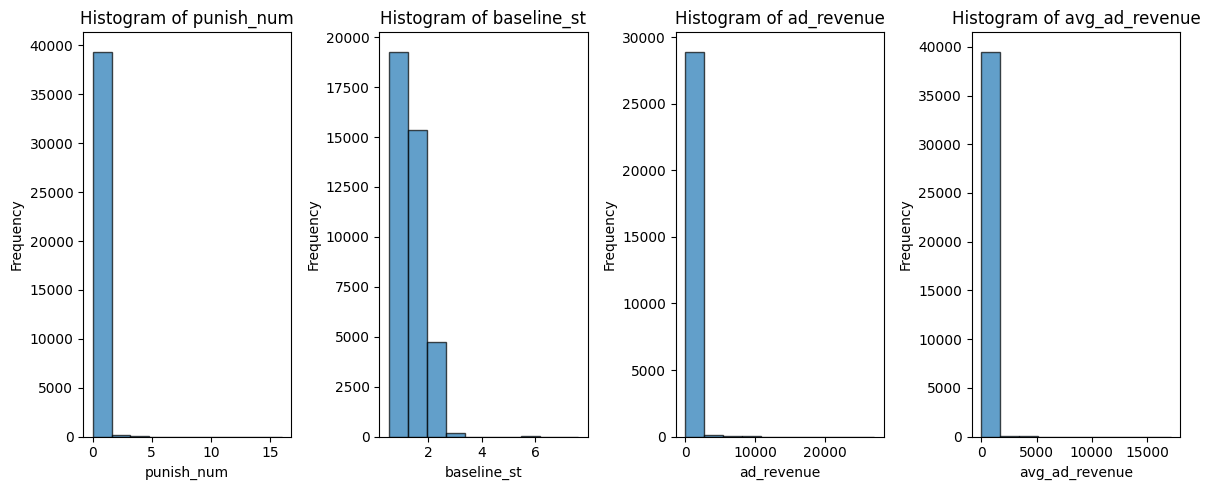

In [196]:
plt.figure(figsize=(12, 5))
numerical_columns = [ 'punish_num','baseline_st' ,'ad_revenue', 'avg_ad_revenue']

for i, column_name in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    plt.hist(ads_dim2[column_name], bins=10, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


#### From the above histograms, we can see that the variables are not normally distributed. The data seems extremely skewed as well. 

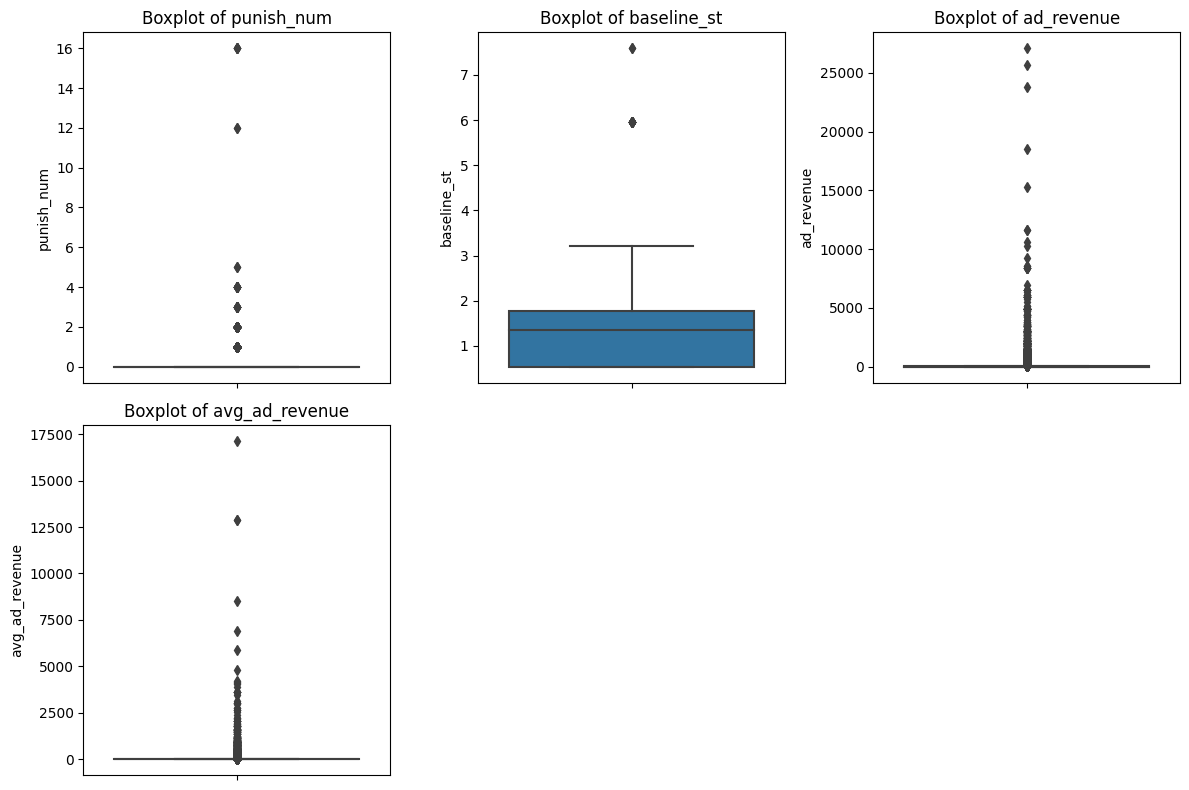

In [197]:
# Select numerical columns for outlier analysis
numerical_columns = [ 'punish_num','baseline_st' ,'ad_revenue', 'avg_ad_revenue']
# Create boxplots for each numerical column
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=ads_dim2, y=column)
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()




In [198]:
ads_dim2["punish_num"].value_counts()

0.0     37236
1.0      2134
2.0       158
4.0        14
3.0        13
16.0        5
12.0        2
5.0         2
Name: punish_num, dtype: int64

### Find the number of outliers per numerical column

In [199]:


punish_num_outliers = ads_dim2[ads_dim2['punish_num'] > 10]

print("The number of outliers for punish_num = ", len(punish_num_outliers))
print(punish_num_outliers["punish_num"])



baseline_st_outliers = ads_dim2[ads_dim2['baseline_st'] > 5]

print("The number of outliers for baseline_st = ", len(baseline_st_outliers))
print(punish_num_outliers["baseline_st"])


The number of outliers for punish_num =  7
10     16.0
11     16.0
12     16.0
15     16.0
16     16.0
508    12.0
531    12.0
Name: punish_num, dtype: float64
The number of outliers for baseline_st =  23
10     3.21
11     3.21
12     3.21
15     3.21
16     3.21
508    2.14
531    2.14
Name: baseline_st, dtype: float64


In [200]:
ad_rev_outliers = ads_dim2[ads_dim2['ad_revenue'] > 20000]

print("The number of outliers for ad_rev = ", len(ad_rev_outliers))
print(punish_num_outliers["ad_revenue"])

avg_ad_revenue_outliers = ads_dim2[ads_dim2['avg_ad_revenue'] > 10000]

print("The number of outliers for avg_ad_revenue = ", len(avg_ad_revenue_outliers))
print(punish_num_outliers["avg_ad_revenue"])

The number of outliers for ad_rev =  3
10     517.5400
11     530.7100
12       0.0000
15     547.4000
16     528.1400
508         NaN
531      1.1753
Name: ad_revenue, dtype: float64
The number of outliers for avg_ad_revenue =  3
10     23.7129
11     23.7129
12     23.7129
15     23.7129
16     23.7129
508     2.4270
531     2.4270
Name: avg_ad_revenue, dtype: float64


#### From the above outlier analysis, we can see that these variables all have outliers. As these variables have different max and std values, scaling is required. Since outliers are present and that these variables are in a non -normal distribution suggests that robust scaling should be conducted on the data. We use robust scaling as we want to bring the data into a consistent scale while minimizing the impact of extreme values. This technique would also be helpful for machine learning models that would be utilised later on. 


## Robust Scaling

In [201]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler() 


In [202]:
variables = ["punish_num",	"ad_revenue", "avg_ad_revenue",	"baseline_st"]

## create new dataframe 
ads_dim_scaled = ads_dim2.copy()
subset = ads_dim2[variables]


# fit and transform variables 
scaled_data = scaler.fit_transform(subset)
ads_dim_scaled[variables] = scaled_data



In [203]:
ads_dim_scaled.describe()

,ad_id,punish_num,ad_revenue,avg_ad_revenue,baseline_st
count,3.956400e+04,39564.000000,29069.000000,39564.000000,39564.000000
mean,1.772993e+15,0.067208,3.621940,2.862886,-0.131257
std,2.546392e+12,0.338988,26.381103,26.056718,0.532916
min,1.697828e+15,0.000000,-0.315014,-0.351337,-0.661290
25%,1.773399e+15,0.000000,-0.241614,-0.237628,-0.661290
50%,1.773532e+15,0.000000,0.000000,0.000000,0.000000
75%,1.773564e+15,0.000000,0.758386,0.762372,0.338710
max,1.773617e+15,16.000000,1449.102024,2371.571935,5.024194


### However we realise that some values like the ad_revenue goes below 0, which does not make logical sense. Thus, we apply the shift and scale method to the columns having negative values in the dataset to preserve the order and distribution and logical sense. 

In [204]:
columns = ["ad_revenue", "avg_ad_revenue", "baseline_st"]


for column in columns:
    ads_dim_scaled[column] += abs(ads_dim_scaled[column].min())


ads_dim_scaled.describe()

,ad_id,punish_num,ad_revenue,avg_ad_revenue,baseline_st
count,3.956400e+04,39564.000000,29069.000000,39564.000000,39564.000000
mean,1.772993e+15,0.067208,3.936954,3.214223,0.530034
std,2.546392e+12,0.338988,26.381103,26.056718,0.532916
min,1.697828e+15,0.000000,0.000000,0.000000,0.000000
25%,1.773399e+15,0.000000,0.073400,0.113709,0.000000
50%,1.773532e+15,0.000000,0.315014,0.351337,0.661290
75%,1.773564e+15,0.000000,1.073400,1.113709,1.000000
max,1.773617e+15,16.000000,1449.417037,2371.923272,5.685484


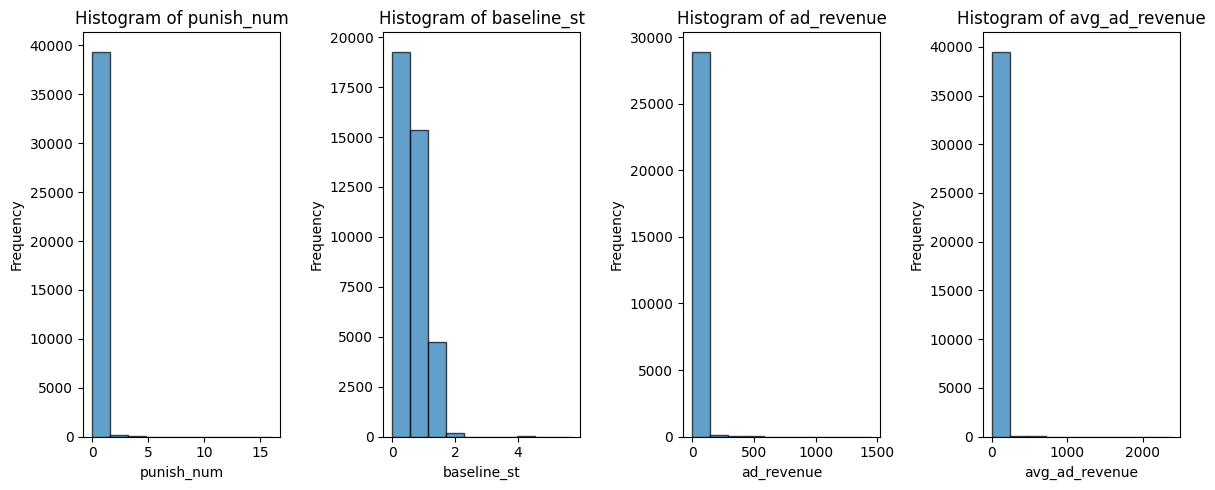

In [205]:
plt.figure(figsize=(12, 5))
numerical_columns = [ 'punish_num','baseline_st' ,'ad_revenue', 'avg_ad_revenue']

for i, column_name in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    plt.hist(ads_dim_scaled[column_name], bins=10, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


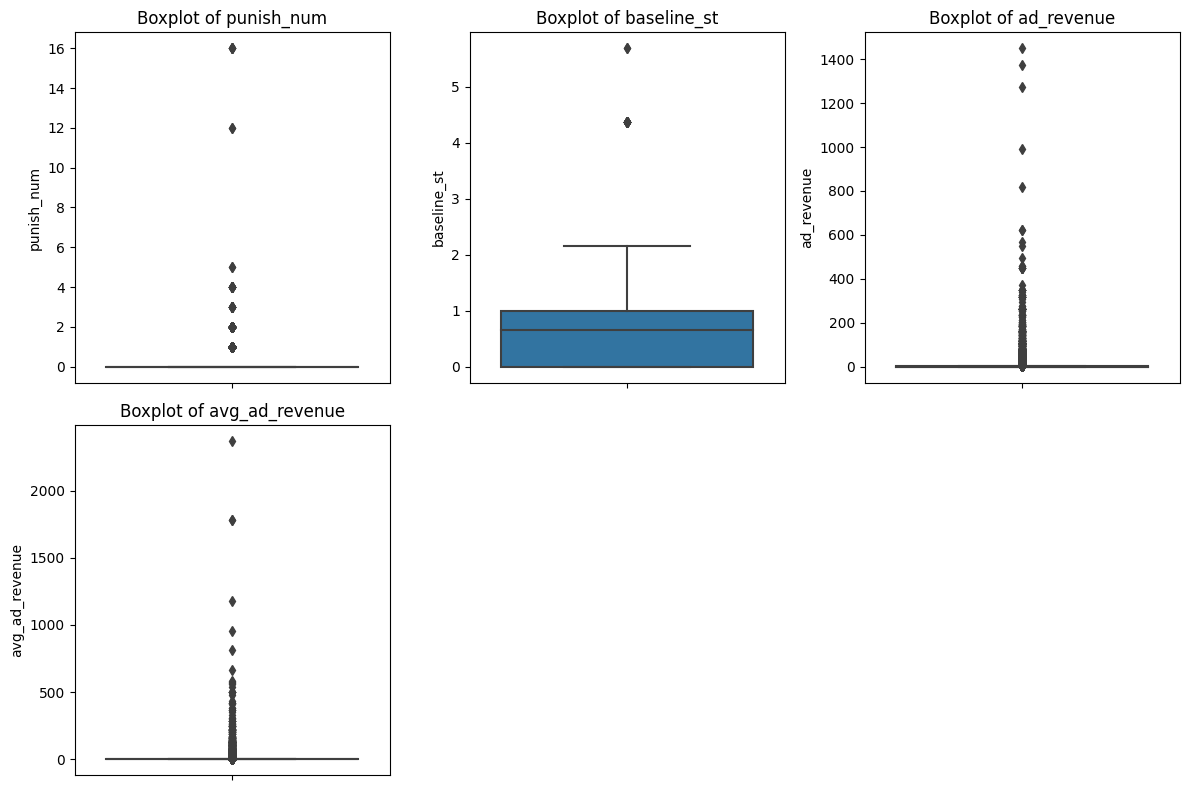

In [206]:
# Select numerical columns for outlier analysis
numerical_columns = [ 'punish_num','baseline_st' ,'ad_revenue', 'avg_ad_revenue']
# Create boxplots for each numerical column
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=ads_dim_scaled, y=column)
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()




### Convert 'latest_punish_begin_date' to numerical variable 'days_since_punish'

In [207]:
# Convert 'latest_punish_begin_date' to numerical variable 'days_since_punish'
# Convert to datetime format
ads_dim_scaled['latest_punish_begin_date'] = pd.to_datetime(ads_dim_scaled['latest_punish_begin_date'])

# Get the latest date of punishment 
latest_date = ads_dim_scaled['latest_punish_begin_date'].max()
print(latest_date)

# Get the earliest date of punishment when there is punishment (excluding '2000-01-01 00:00:00')
earliest_date = ads_dim_scaled[ads_dim_scaled['latest_punish_begin_date'] != '2000-01-01 00:00:00']['latest_punish_begin_date'].min()
print(earliest_date)

# Set the reference cutoff date to latest date of punishment
reference_date = pd.to_datetime('2023-08-07 00:00:00')

# Calculate the number of days ago from the reference date
ads_dim_scaled['days_since_punish'] = (reference_date - ads_dim_scaled['latest_punish_begin_date']).dt.days

# If date_column is '2000-01-01', set days_since_punish to 90
ads_dim_scaled.loc[ads_dim_scaled['latest_punish_begin_date'] == '2000-01-01', 'days_since_punish'] = 90

print(ads_dim_scaled['days_since_punish'])
ads_dim_scaled.head()

2023-08-07 00:00:00
2023-05-10 00:00:00
0        14
1        54
2        14
3        14
4        14
         ..
40673    90
40674    90
40675    90
40676    90
40678    90
Name: days_since_punish, Length: 39564, dtype: int64


,ad_id,delivery_country,punish_num,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en,days_since_punish
0,1747578422390810,US,1.0,2023-07-24,274.482821,663.417772,2022-10-24 14:36:00,1.000000,Auction Ads,auction_relation,14
1,1758543228094480,SA,1.0,2023-06-14,105.695383,147.171041,2023-02-22 15:50:00,0.911290,RIE,Ad Group Recall (Merged),54
2,1738303151826990,AU,2.0,2023-07-24,0.092819,0.742242,2022-07-14 05:00:00,1.048387,Auction Ads,auction_relation,14
3,1738303920938010,NZ,2.0,2023-07-24,NaN,0.742242,2022-07-14 05:16:00,0.838710,Auction Ads,auction_relation,14
4,1738304016410620,NZ,2.0,2023-07-24,0.081561,0.742242,2022-07-14 05:17:00,0.838710,Auction Ads,auction_relation,14


### Convert 'start_time' to numerical variable 'ad_run_time' in days

In [277]:
# Convert start_time column to datetime format
ads_dim_scaled['start_time'] = pd.to_datetime(ads_dim_scaled['start_time'])

# Get the latest start_time of ad 
latest_date_start_time = ads_dim_scaled['start_time'].max()
print(latest_date_start_time)

# Get the earliest start_time of ad 
earliest_date_start_time = ads_dim_scaled['start_time'].min()
print(earliest_date_start_time)

# Remove dates after 7 Aug 2023
ads_dim3 = ads_dim_scaled[ads_dim_scaled['start_time'] < '2023-08-08'].copy()

# Check percentage of samples remaining after removing rows with start_time after 7 Aug 2023
print(len(ads_dim3)/len(ads_dim_scaled) * 100)

# Calculate time difference in days for each row with 2023-08-08 00:00:00 as cutoff time
cutoff = pd.to_datetime("2023-08-08 00:00:00")
ads_dim3['ad_run_time'] = (cutoff - ads_dim3['start_time']).dt.total_seconds()/86400

print(ads_dim3['ad_run_time'])
ads_dim3.head()


2023-09-13 07:00:00
2021-04-23 10:39:00
81.77383479931251
0        287.391667
1        166.340278
2        389.791667
3        389.780556
4        389.779861
            ...    
33685      0.000694
33686      0.000694
33691      0.000694
33692      0.000694
33694      0.000694
Name: ad_run_time, Length: 32353, dtype: float64


,ad_id,delivery_country,punish_num,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en,days_since_punish,ad_run_time
0,1747578422390810,US,1.0,2023-07-24,274.482821,663.417772,2022-10-24 14:36:00,1.000000,Auction Ads,auction_relation,14,287.391667
1,1758543228094480,SA,1.0,2023-06-14,105.695383,147.171041,2023-02-22 15:50:00,0.911290,RIE,Ad Group Recall (Merged),54,166.340278
2,1738303151826990,AU,2.0,2023-07-24,0.092819,0.742242,2022-07-14 05:00:00,1.048387,Auction Ads,auction_relation,14,389.791667
3,1738303920938010,NZ,2.0,2023-07-24,NaN,0.742242,2022-07-14 05:16:00,0.838710,Auction Ads,auction_relation,14,389.780556
4,1738304016410620,NZ,2.0,2023-07-24,0.081561,0.742242,2022-07-14 05:17:00,0.838710,Auction Ads,auction_relation,14,389.779861


In [209]:
# # all latest_punish_begin_date = 2000-01-01 if punish_num is blank, so we replace the blank with a 0
ads_dim3['punish_num'].fillna(0, inplace=True)
# Display the distribution for 'latest_punish_begin_date'
print(ads_dim3['punish_num'].value_counts())


ads_dim3.head()

0.0     30222
1.0      1943
2.0       154
4.0        14
3.0        11
16.0        5
12.0        2
5.0         2
Name: punish_num, dtype: int64


,ad_id,delivery_country,punish_num,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en,days_since_punish,ad_run_time
0,1747578422390810,US,1.0,2023-07-24,274.482821,663.417772,2022-10-24 14:36:00,1.000000,Auction Ads,auction_relation,14,287.391667
1,1758543228094480,SA,1.0,2023-06-14,105.695383,147.171041,2023-02-22 15:50:00,0.911290,RIE,Ad Group Recall (Merged),54,166.340278
2,1738303151826990,AU,2.0,2023-07-24,0.092819,0.742242,2022-07-14 05:00:00,1.048387,Auction Ads,auction_relation,14,389.791667
3,1738303920938010,NZ,2.0,2023-07-24,NaN,0.742242,2022-07-14 05:16:00,0.838710,Auction Ads,auction_relation,14,389.780556
4,1738304016410620,NZ,2.0,2023-07-24,0.081561,0.742242,2022-07-14 05:17:00,0.838710,Auction Ads,auction_relation,14,389.779861


In [210]:
ads_dim3 = ads_dim3.drop('latest_punish_begin_date', axis=1)
ads_dim3 = ads_dim3.drop('start_time', axis=1)

### Avg Revenue VS Ad_Revenue 

count     27609.000000
mean         41.339454
std        3201.040360
min           0.000000
25%           0.629736
50%           1.358324
75%           2.975700
max      528150.989599
Name: Avg_to_rev_ratio, dtype: float64

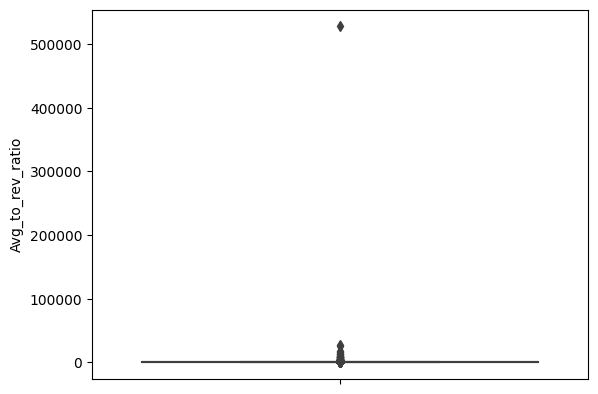

In [278]:
ads_dim3["Avg_to_rev_ratio"] = ads_dim3["avg_ad_revenue"] / ads_dim3["ad_revenue"]
ads_dim3["Avg_to_rev_ratio"]
sns.boxplot(data=ads_dim3, y="Avg_to_rev_ratio")

## replace inf with NaN 
ads_dim3["Avg_to_rev_ratio"] = ads_dim3["Avg_to_rev_ratio"].replace([np.inf, -np.inf], np.nan)
ads_dim3["Avg_to_rev_ratio"].describe()

In [273]:
# remove outlier 
ads_dim_ratio = ads_dim3[ads_dim3["Avg_to_rev_ratio"] <= 500000]
ads_dim_ratio["Avg_to_rev_ratio"].value_counts()
ads_dim_ratio["Avg_to_rev_ratio"].describe()




count    27608.000000
mean        22.210591
std        379.686106
min          0.000000
25%          0.629724
50%          1.358233
75%          2.975122
max      26856.025021
Name: Avg_to_rev_ratio, dtype: float64

#### Looking at the mean of the described data regarding ratio, we plot a histogram to see the general distribution

(array([17523.,  4823.,  1502.,   746.,   489.,   360.,   277.,   159.,
          150.,   112.,    99.,    75.,    73.,    50.,    59.,    51.,
           50.,    35.,    37.,    27.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.,
        26., 28., 30., 32., 34., 36., 38., 40.]),
 <BarContainer object of 20 artists>)

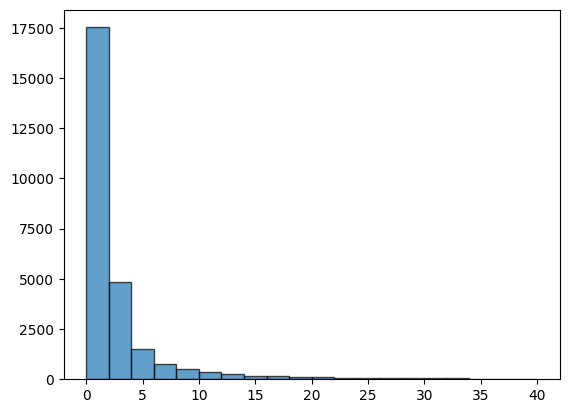

In [274]:
plt.hist(ads_dim_ratio["Avg_to_rev_ratio"], bins=20, edgecolor='black', alpha=0.7, range=(0,40))


<Axes: ylabel='Avg_to_rev_ratio'>

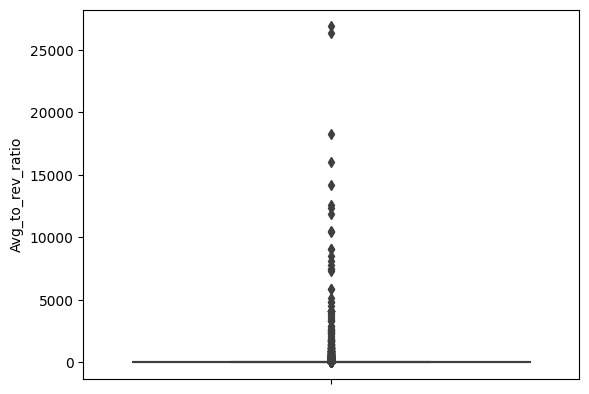

In [275]:
sns.boxplot(data=ads_dim_ratio, y="Avg_to_rev_ratio")


#### There can be seen to be a substantial amount of outliers, however with a high proportion with a low ratio. A high ratio may be assumed to be more suspicious as the advertisement is driving more revenue than the average, thus this can be used as an important factor for reviewing of ads later.  

### Categorical Variables 

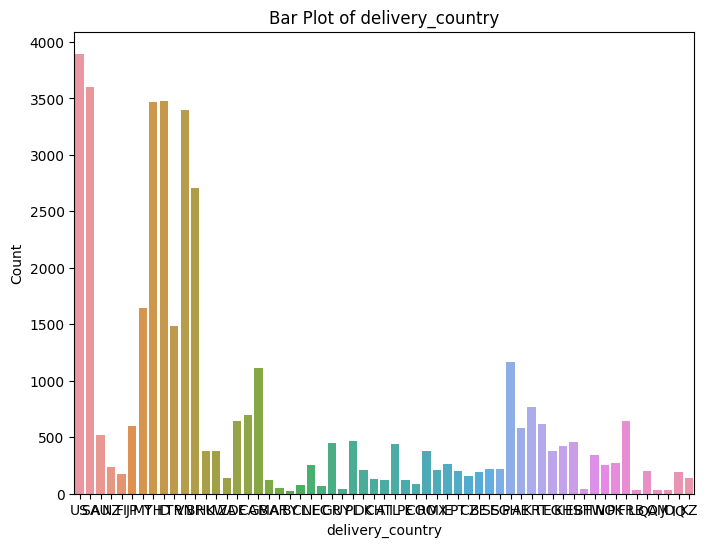

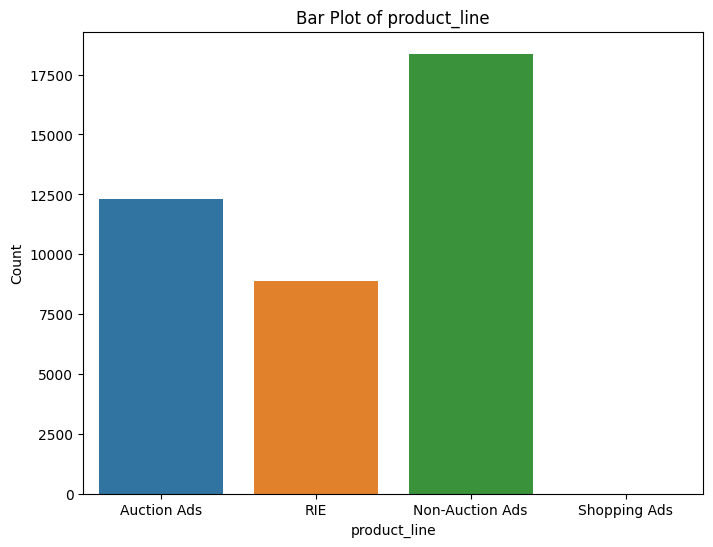

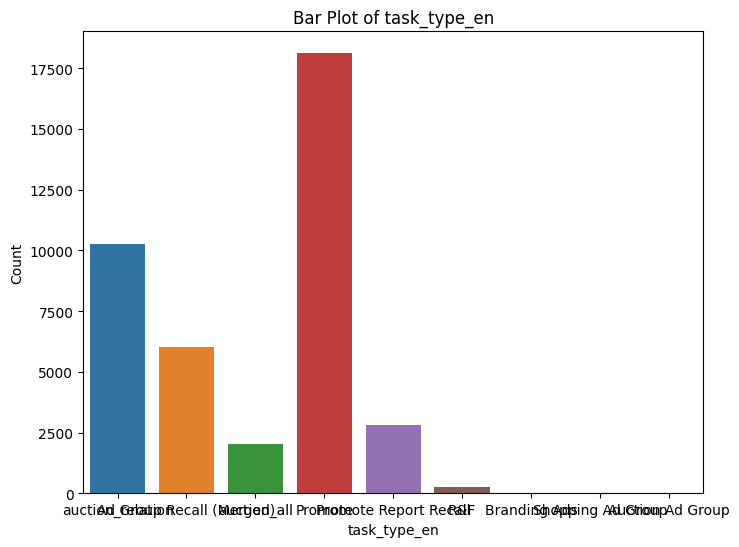

In [212]:
cat_cols = [ 'delivery_country','product_line' ,'task_type_en']

# Create a bar plot for each categorical column
for column in cat_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=ads_dim_scaled, x=column)
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

### One Hot Encoding For Categorical Variables 

#### For categorical variables, we will one hot encode them so that it can be used for machine learning models since ML models require input variables 

In [280]:
cat = ["delivery_country", "product_line", "task_type_en"]

In [284]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ads_dim3[cat] = ads_dim3[cat].apply(le.fit_transform)


,ad_id,delivery_country,punish_num,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en,days_since_punish,ad_run_time,Avg_to_rev_ratio
0,1747578422390810,55,1.0,2023-07-24,274.482821,663.417772,2022-10-24 14:36:00,1.000000,0,8,14,287.391667,2.416974
1,1758543228094480,49,1.0,2023-06-14,105.695383,147.171041,2023-02-22 15:50:00,0.911290,2,0,54,166.340278,1.392407
2,1738303151826990,3,2.0,2023-07-24,0.092819,0.742242,2022-07-14 05:00:00,1.048387,0,8,14,389.791667,7.996627
3,1738303920938010,40,2.0,2023-07-24,NaN,0.742242,2022-07-14 05:16:00,0.838710,0,8,14,389.780556,NaN
4,1738304016410620,40,2.0,2023-07-24,0.081561,0.742242,2022-07-14 05:17:00,0.838710,0,8,14,389.779861,9.100423
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33685,1773615094493180,23,0.0,2000-01-01,NaN,0.049681,2023-08-07 23:59:00,0.000000,1,3,90,0.000694,NaN
33686,1773551211315200,57,0.0,2000-01-01,NaN,0.244421,2023-08-07 23:59:00,0.000000,1,3,90,0.000694,NaN
33691,1773616283076610,19,0.0,2000-01-01,NaN,0.114802,2023-08-07 23:59:00,0.000000,1,3,90,0.000694,NaN
33692,1773601710478340,55,0.0,2000-01-01,NaN,0.228207,2023-08-07 23:59:00,0.000000,1,3,90,0.000694,NaN


## Moderator Dimension

In [214]:
print(mod_dim.shape)
# Check for duplicate rows in mod_dim 
mod_duplicates = mod_dim.duplicated().sum()
print(mod_duplicates)

(1414, 6)
0


In [215]:
# find number of null values in each column

for col in mod_dim.columns:
    if mod_dim[col].isna().sum() > 0:
        print(f' "{col}" : {mod_dim[col].isna().sum()}')
    else:
        continue

# accuracy colum contains "-" values
non_numeric_values = mod_dim[pd.to_numeric(mod_dim[" accuracy "], errors='coerce').isna()]
len(non_numeric_values)

print(non_numeric_values)

 "Productivity" : 129
 "Utilisation %" : 129
             moderator                                             market  \
0     1689841547143170  ["SA", "OM", "BH", "QA", "JO", "IQ", "KW", "EG...   
265   1694555598292994                                             ["NL"]   
412   1761892264652818                                             ["DE"]   
510            1005827                                             ["BR"]   
529            2796851                                             ["KZ"]   
892            3778633                                             ["TR"]   
916            5581253                                             ["DK"]   
943            9699751                                             ["ID"]   
1283           1822136                                       ["GB", "IE"]   
1331           3297271                                          ["OTHER"]   
1393  1695027913818113                                             ["IT"]   

      Productivity  Utilisatio

In [216]:
# remove rows that have null values for productivity and utilisation, and "-" values for accuracy
column_name = ' accuracy '
numeric_mask = pd.to_numeric(mod_dim[column_name], errors='coerce').notna()
cleaned_mod_dim = mod_dim[numeric_mask]

print(len(cleaned_mod_dim))

columns_to_check = ['Productivity', 'Utilisation %']

cleaned_mod_dim = cleaned_mod_dim.dropna(subset=columns_to_check, how='all')

print(len(cleaned_mod_dim))


1403
1275


### Exploratory Data Analysis of Moderator Dimension

In [217]:
# Get basic statistics of numeric columns
print(cleaned_mod_dim.describe())

# Check for missing values
print(cleaned_mod_dim.isnull().sum())

# Check data types of columns
print(cleaned_mod_dim.dtypes)

          moderator  Productivity  Utilisation %  handling time
count  1.275000e+03   1275.000000    1275.000000   1.275000e+03
mean   1.084096e+15    368.445545       0.725055   1.068949e+05
std    8.345996e+14    177.840831       0.195460   3.747668e+05
min    1.003316e+06      0.540000       0.000000   7.300000e+01
25%    7.064704e+06    249.239693       0.658732   6.276050e+04
50%    1.695291e+15    344.712500       0.779906   8.586800e+04
75%    1.736353e+15    462.375000       0.849611   1.016235e+05
max    1.774284e+15   1323.355000       1.287250   9.443621e+06
moderator        0
market           0
Productivity     0
Utilisation %    0
handling time    0
 accuracy        0
dtype: int64
moderator          int64
market            object
Productivity     float64
Utilisation %    float64
handling time      int64
 accuracy         object
dtype: object


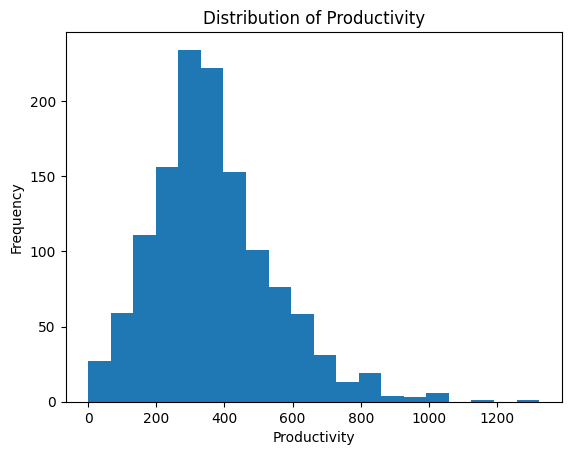

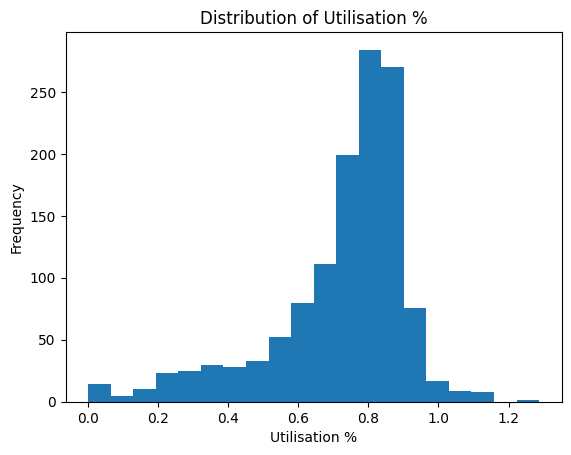

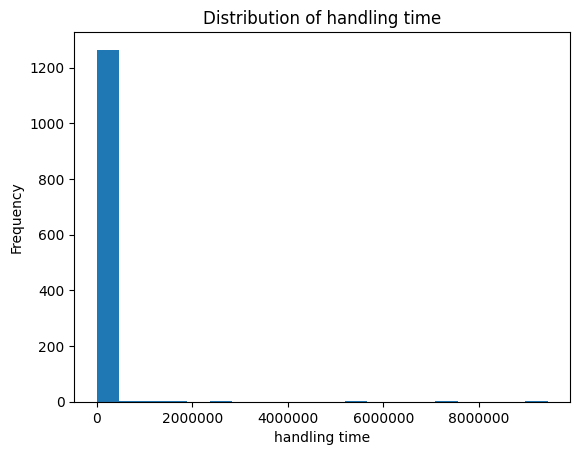

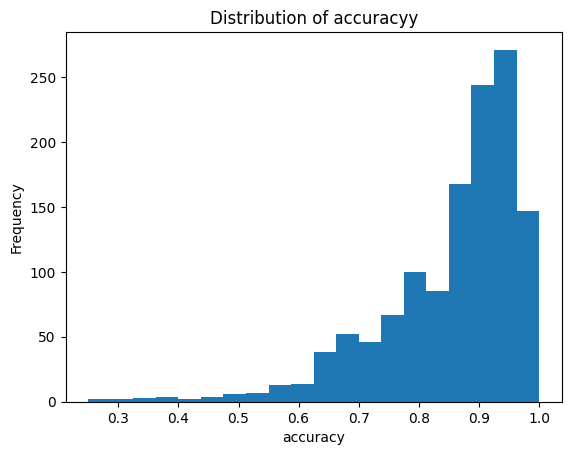

In [218]:

# Histogram of 'Productivity'
plt.hist(cleaned_mod_dim['Productivity'], bins=20)
plt.xlabel('Productivity')
plt.ylabel('Frequency')
plt.title('Distribution of Productivity')
plt.show()

# Histogram of 'Utilisation %'
plt.hist(cleaned_mod_dim['Utilisation %'], bins=20)
plt.xlabel('Utilisation %')
plt.ylabel('Frequency')
plt.title('Distribution of Utilisation %')
plt.show()


# Histogram of 'handling time'
plt.hist(cleaned_mod_dim['handling time'], bins=20)
plt.xlabel('handling time')
plt.ylabel('Frequency')
plt.title('Distribution of handling time')
plt.ticklabel_format(style='plain', axis='x')
plt.show()


# Histogram of 'accuracy'
plt.hist(cleaned_mod_dim[' accuracy ' ], bins=20)
plt.xlabel('accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of accuracyy')
plt.show()


/var/folders/1t/nll74_0j61918pgb1cz1kwsr0000gn/T/ipykernel_9600/2370735937.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = cleaned_mod_dim.corr()


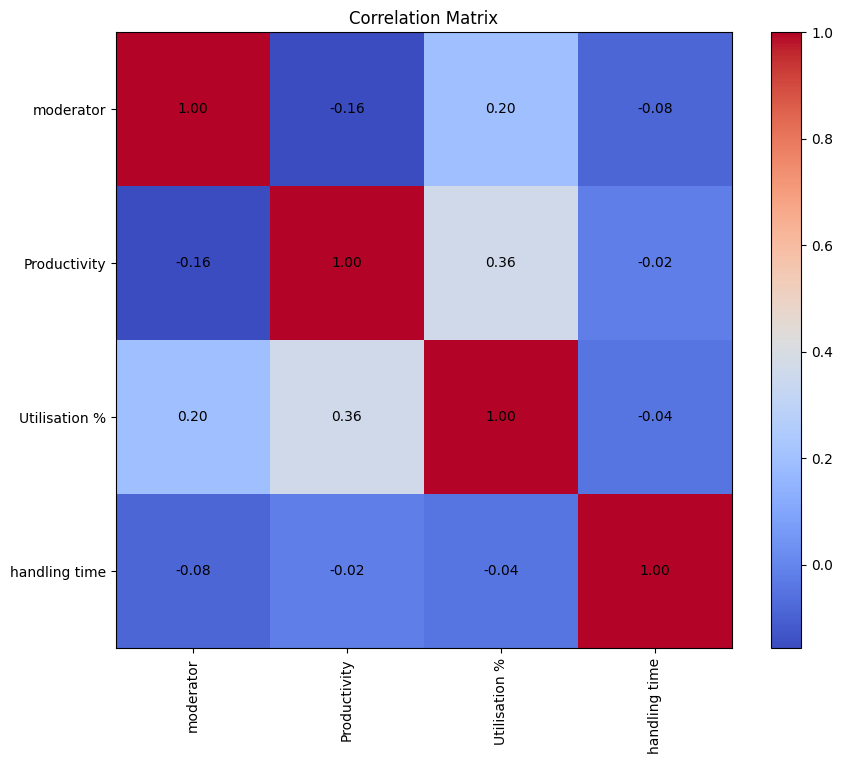

In [219]:
# Compute the correlation matrix
correlation_matrix = cleaned_mod_dim.corr()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Create the heatmap using imshow
im = ax.imshow(correlation_matrix, cmap='coolwarm')

# Add colorbar
cbar = plt.colorbar(im)

# Set ticks and labels
tick_marks = np.arange(len(correlation_matrix.columns))
plt.xticks(tick_marks, correlation_matrix.columns, rotation=90)
plt.yticks(tick_marks, correlation_matrix.columns)

# Add text annotations for each correlation coefficient
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = f"{correlation_matrix.iloc[i, j]:.2f}"  # Format to two decimal places
        ax.text(j, i, text, ha='center', va='center', color='black', fontsize=10)

# Set the title
plt.title('Correlation Matrix')

# Show the plot
plt.show()